<a href="https://colab.research.google.com/github/mr-nudo/neuronModels1/blob/master/Feedforward_Noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nengo
import numpy as np
import matplotlib.pyplot as plt
import nengo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.5/538.5 kB 7.3 MB/s eta 0:00:00


ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 467, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 389, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

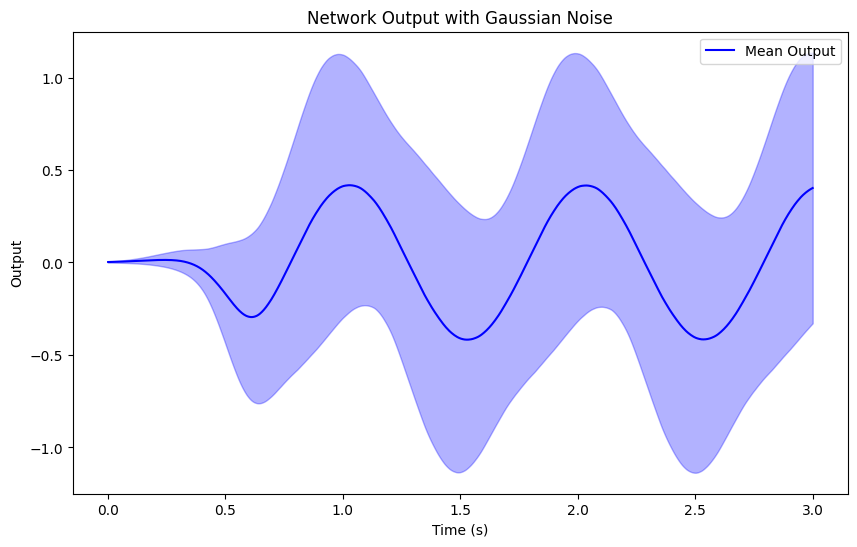

In [3]:


# Parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10  # Number of simulations to average results

# Define the model
model = nengo.Network()
with model:
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                         max_rates=nengo.dists.Uniform(0.5, 1))

    def oscillator(x):
        r = 1
        f = 1
        m = 10
        return [
            synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
            synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
        ]

    c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                         solver=nengo.solvers.LstsqL2(reg=reg))
    output = nengo.Node(None, size_in=1)
    c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

    p_neurons = nengo.Probe(ens.neurons)
    p_out = nengo.Probe(output)

# Run simulations with noise and collect results
data_out_all = []
for _ in range(num_simulations):
    # Generate noisy input signal
    input_signal = np.zeros((int(simulation_time/dt), 1))  # Define input signal
    input_signal_with_noise = input_signal + np.random.normal(loc=0, scale=0.1, size=input_signal.shape)

    # Run simulation
    sim = nengo.Simulator(model, dt=dt)
    with sim:
        sim.run(simulation_time)

    # Record output
    data_out_all.append(sim.data[p_out])

# Calculate mean and standard deviation across simulations
data_out_mean = np.mean(data_out_all, axis=0)
data_out_std = np.std(data_out_all, axis=0)

# Plot results with error bars
plt.figure(figsize=(10, 6))
plt.plot(sim.trange(), data_out_mean, label='Mean Output', color='b')
plt.fill_between(sim.trange(), data_out_mean.squeeze() - data_out_std.squeeze(),
                 data_out_mean.squeeze() + data_out_std.squeeze(), alpha=0.3, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Network Output with Gaussian Noise')
plt.legend()
plt.show()

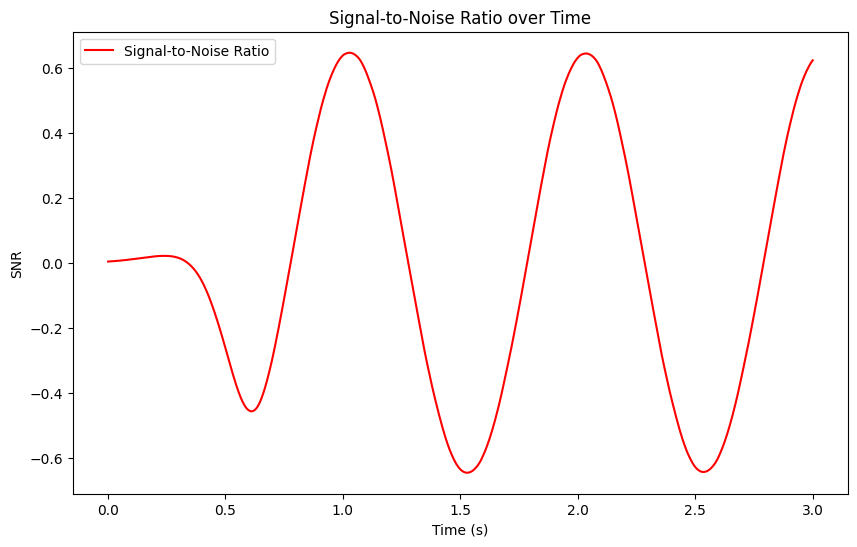

In [4]:
# Calculate SNR
signal = data_out_mean.squeeze()  # Mean output signal
noise = np.mean([np.std(data.squeeze()) for data in data_out_all])  # Mean noise level across simulations
snr = signal / noise

# Plot SNR
plt.figure(figsize=(10, 6))
plt.plot(sim.trange(), snr, label='Signal-to-Noise Ratio', color='r')
plt.xlabel('Time (s)')
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio over Time')
plt.legend()
plt.show()

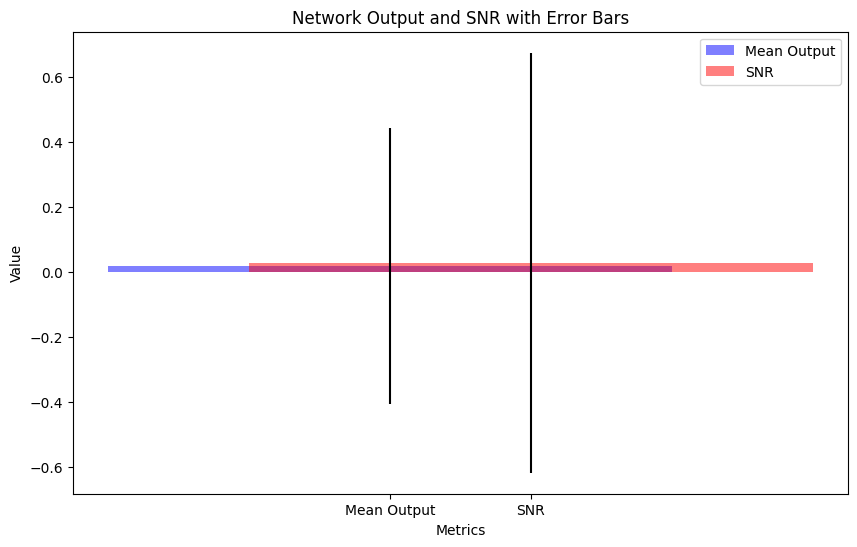

In [5]:
# Plot results in a bar chart with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean output with error bars
ax.bar(sim.trange()[-1], np.mean(data_out_mean), yerr=np.std(data_out_mean), color='b', alpha=0.5, label='Mean Output')

# Plot SNR with error bars
ax.bar(sim.trange()[-1] + 0.2, np.mean(snr), yerr=np.std(snr), color='r', alpha=0.5, label='SNR')

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Network Output and SNR with Error Bars')
ax.set_xticks([sim.trange()[-1], sim.trange()[-1] + 0.2])
ax.set_xticklabels(['Mean Output', 'SNR'])

ax.legend()
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

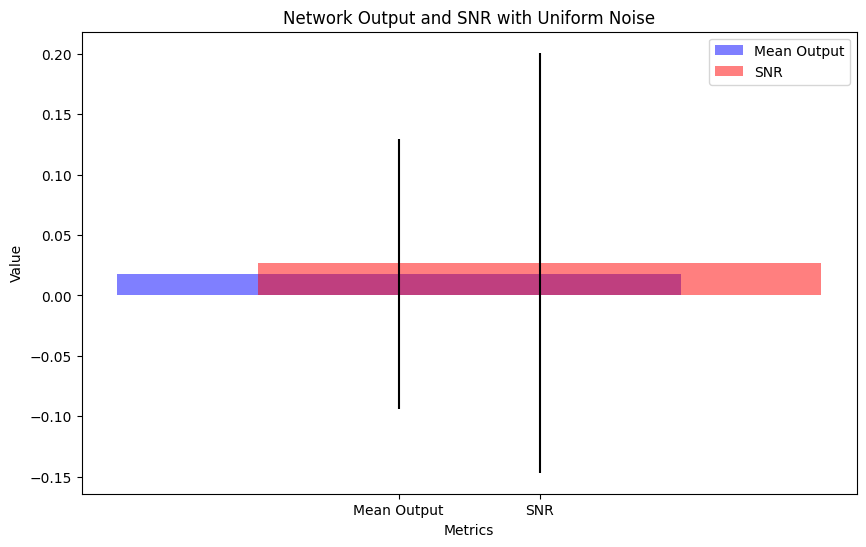

In [8]:
# Generate uniform noise
noise_amplitude = 0.1  # Amplitude of the uniform noise
noise_uniform = np.random.uniform(-noise_amplitude, noise_amplitude, size=input_signal.shape)

# Add uniform noise to the input signal
input_signal_with_noise = input_signal + noise_uniform

# Run simulations with noisy input signal
data_out_all = []
for _ in range(num_simulations):
    # Run simulation with noisy input signal
    sim = nengo.Simulator(model, dt=dt)
    with sim:
        sim.run(simulation_time)
    # Record output
    data_out_all.append(sim.data[p_out])

# Calculate mean and standard deviation across simulations
data_out_mean = np.mean(data_out_all, axis=0)
data_out_std = np.std(data_out_all, axis=0)

# Calculate SNR
signal = data_out_mean.squeeze()  # Mean output signal
noise = np.mean([np.std(data.squeeze()) for data in data_out_all])  # Mean noise level across simulations
snr = signal / noise

# Plot results in a bar chart with error bars
fig, ax = plt.subplots(figsize=(10, 6))

# Plot mean output with error bars
ax.bar(sim.trange()[-1], np.mean(data_out_mean), yerr=np.std(data_out_mean), color='b', alpha=0.5, label='Mean Output')

# Plot SNR with error bars
ax.bar(sim.trange()[-1] + 0.2, np.mean(snr), yerr=np.std(snr), color='r', alpha=0.5, label='SNR')

ax.set_xlabel('Metrics')
ax.set_ylabel('Value')
ax.set_title('Network Output and SNR with Uniform Noise')
ax.set_xticks([sim.trange()[-1], sim.trange()[-1] + 0.2])
ax.set_xticklabels(['Mean Output', 'SNR'])

ax.legend()
plt.show()


ValueError: 'x' and 'y' must have the same size

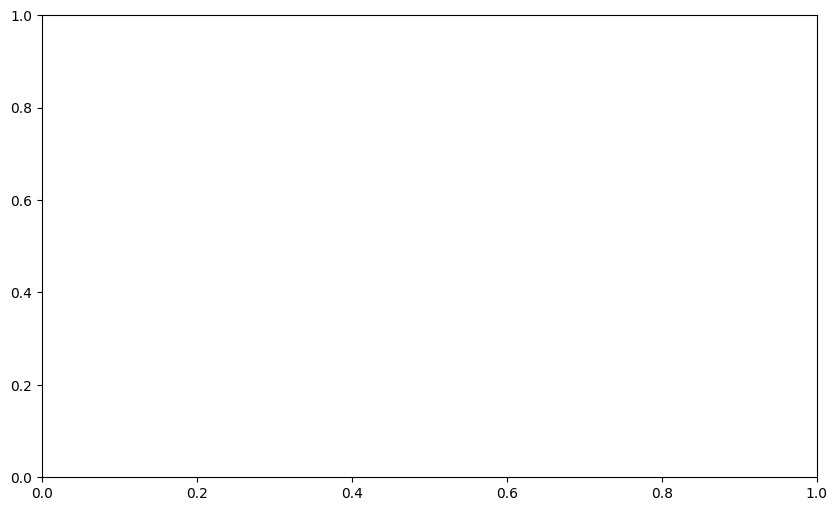

In [15]:
# Plot mean network output
plt.figure(figsize=(10, 6))
plt.errorbar(sim.trange(), np.mean(data_out_mean, axis=0), yerr=np.std(data_out_mean, axis=0), label='Mean Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('Mean Network Output with Uniform Noise')
plt.legend()
plt.show()

# Plot SNR
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(snr)), snr, yerr=np.std(snr), fmt='o', label='SNR', color='r')
plt.xlabel('Time Step')
plt.ylabel('SNR')
plt.title('Signal-to-Noise Ratio (SNR) with Uniform Noise')
plt.legend()
plt.show()


Uniform Noise

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

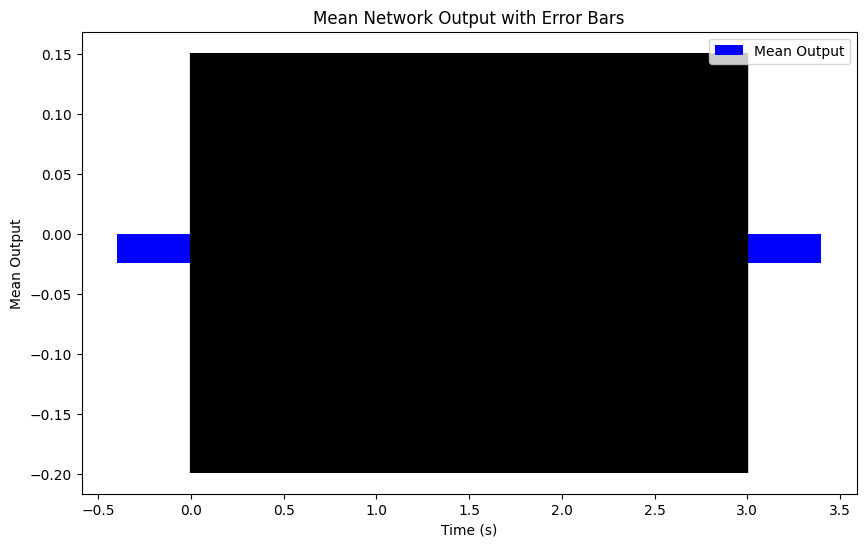

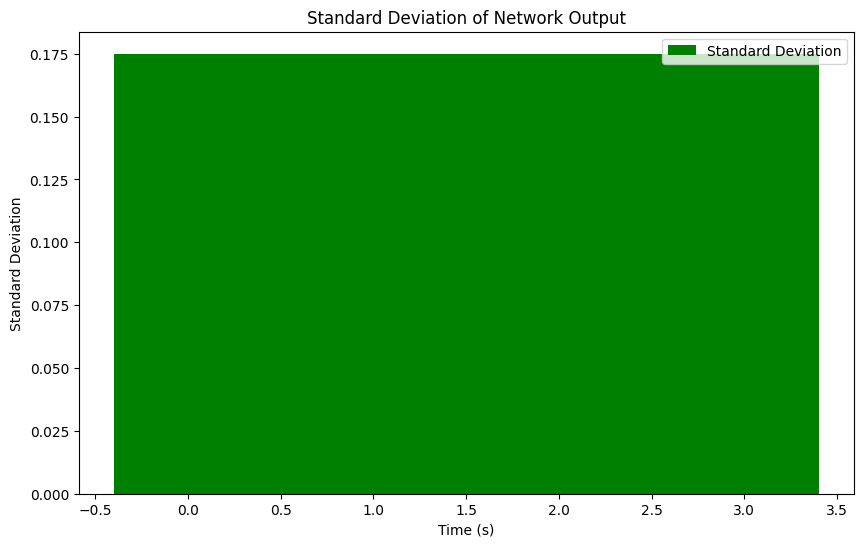

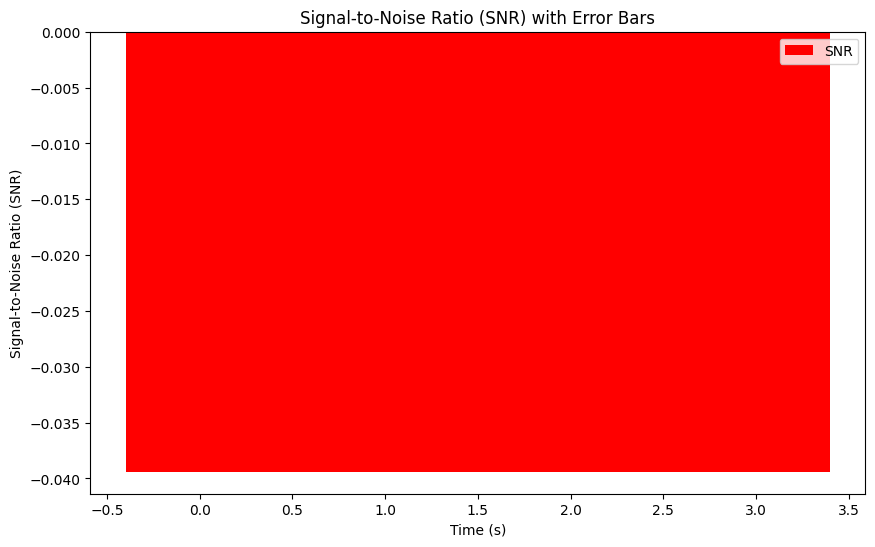

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 3000
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10

# Create the Nengo model
model = nengo.Network()
with model:
    # Define the ensemble and connection
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                         max_rates=nengo.dists.Uniform(0.5, 1))

    def oscillator(x):
        r = 1
        f = 1
        m = 10
        return [
            synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
            synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
        ]

    c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                         solver=nengo.solvers.LstsqL2(reg=reg))

    output = nengo.Node(None, size_in=1)
    c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

    # Probes for recording data
    p_neurons = nengo.Probe(ens.neurons)
    p_out = nengo.Probe(output)

# Run simulations with uniform noise
data_out_all = []
for _ in range(num_simulations):
    with nengo.Simulator(model, dt=dt) as sim:
        sim.run(simulation_time)
    data_out_all.append(sim.data[p_out])

# Calculate mean and standard deviation across simulations
data_out_mean = np.mean(data_out_all, axis=0)
data_out_std = np.std(data_out_all, axis=0)

# Calculate signal-to-noise ratio (SNR)
signal = np.mean(data_out_mean)
noise = np.mean([np.std(data) for data in data_out_all])
snr = signal / noise

# Plot mean output with error bars
plt.figure(figsize=(10, 6))
plt.bar(sim.trange(), np.mean(data_out_mean, axis=0), yerr=np.std(data_out_mean, axis=0), label='Mean Output', color='b')
plt.xlabel('Time (s)')
plt.ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.legend()
plt.show()

# Plot standard deviation with error bars
plt.figure(figsize=(10, 6))
plt.bar(sim.trange(), np.std(data_out_mean, axis=0), label='Standard Deviation', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Network Output')
plt.legend()
plt.show()

# Plot SNR with error bars
plt.figure(figsize=(10, 6))
plt.bar(sim.trange(), snr, label='SNR', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) with Error Bars')
plt.legend()
plt.show()


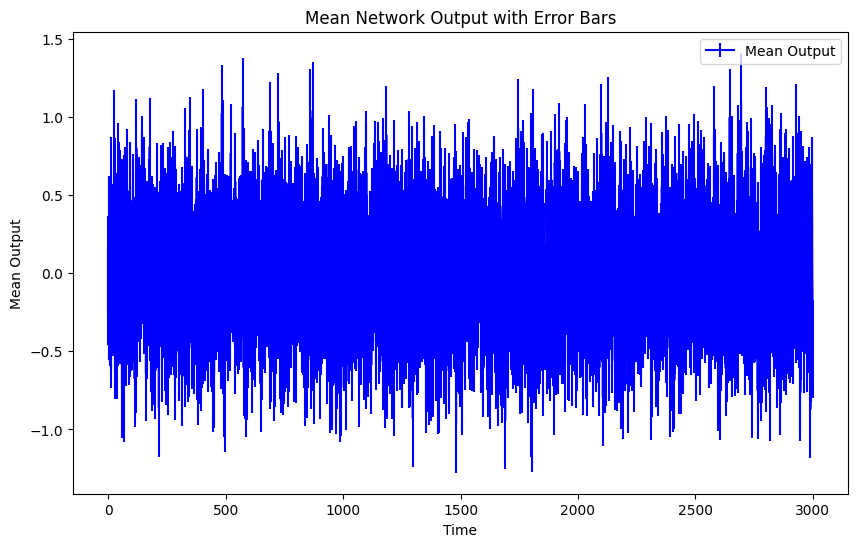

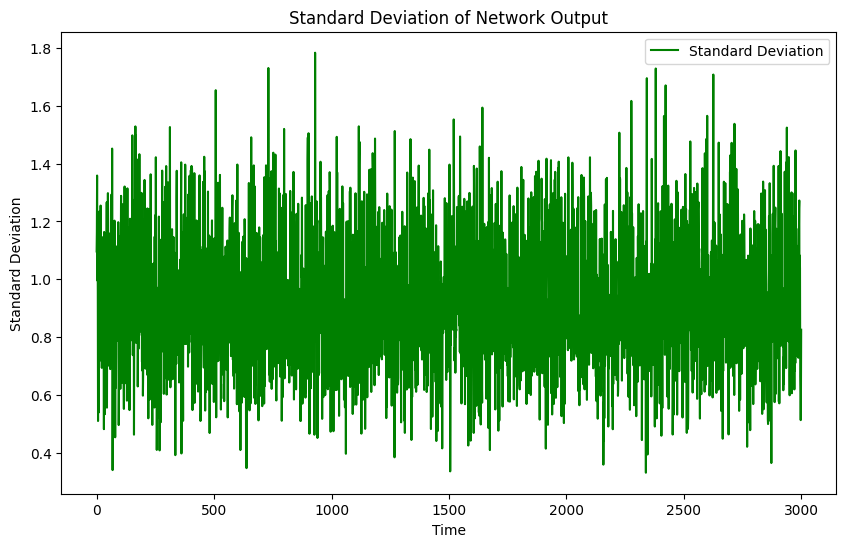

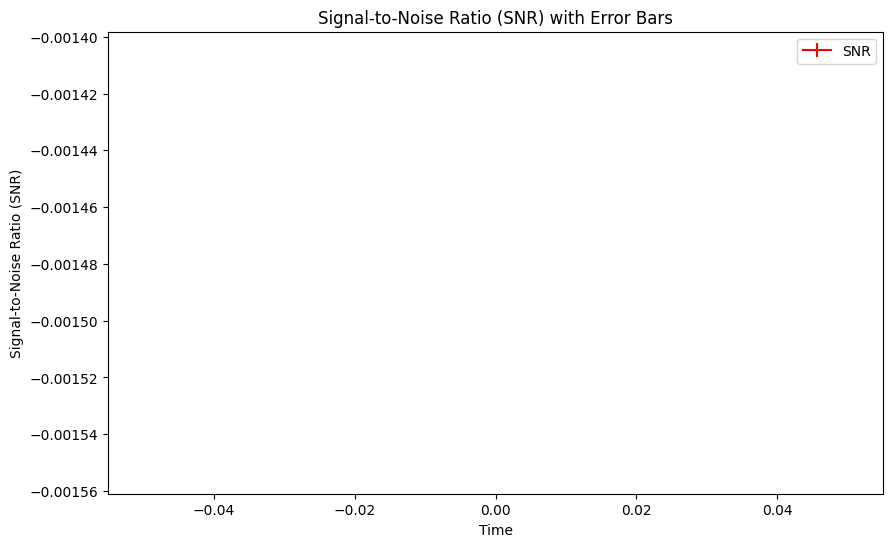

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define model parameters
num_simulations = 10
simulation_time = 3
dt = 0.001

# Simulate multiple runs and collect output data
output_data_all = []
for _ in range(num_simulations):
    # Simulate model and collect output data (replace with actual simulation code)
    output_data = np.random.randn(int(simulation_time / dt))  # Example: Gaussian noise
    output_data_all.append(output_data)

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Calculate signal-to-noise ratio (SNR)
signal = np.mean(mean_output)
noise = np.mean([np.std(data) for data in output_data_all])
snr = signal / noise

# Calculate error bars for mean and SNR
mean_error = np.std(mean_output, axis=0)
snr_error = np.std(snr)

# Plot mean output with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(mean_output)), mean_output, yerr=mean_error, label='Mean Output', color='b')
plt.xlabel('Time')
plt.ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.legend()
plt.show()

# Plot standard deviation
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(std_output)), std_output, label='Standard Deviation', color='g')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Network Output')
plt.legend()
plt.show()

# Plot SNR with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(0, snr, yerr=snr_error, label='SNR', color='r')
plt.xlabel('Time')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) with Error Bars')
plt.legend()
plt.show()


//////////


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

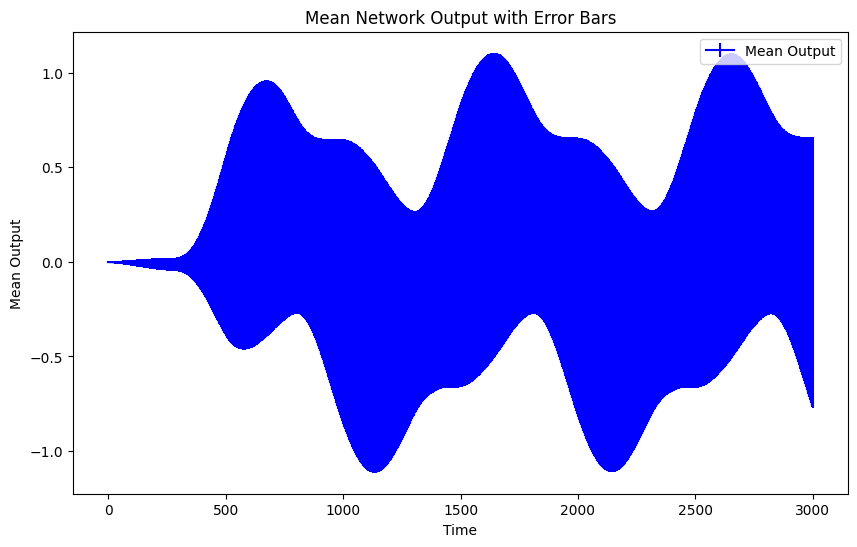

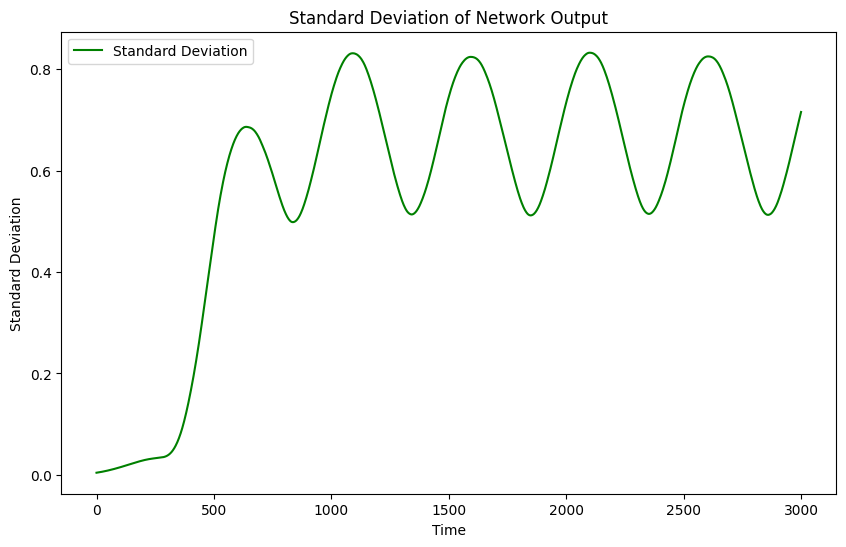

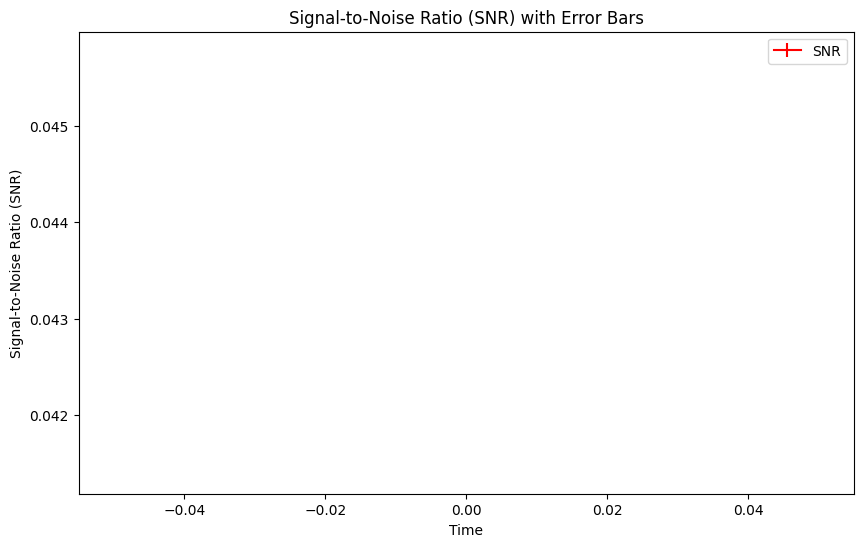

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10

# Define the Nengo model
def simulate_nengo_model():
    model = nengo.Network()
    with model:
        ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                             max_rates=nengo.dists.Uniform(0.5, 1))

        def oscillator(x):
            r = 1
            f = 1
            m = 10
            return [
                synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
                synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
            ]

        c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                             solver=nengo.solvers.LstsqL2(reg=reg))
        output = nengo.Node(None, size_in=1)
        c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

        p_neurons = nengo.Probe(ens.neurons)
        p_out = nengo.Probe(output)

    # Simulate the model
    with nengo.Simulator(model, dt=dt) as sim:
        sim.run(simulation_time)

    return sim.data[p_out]

# Simulate multiple runs and collect output data
output_data_all = []
for _ in range(num_simulations):
    output_data_all.append(simulate_nengo_model()[:, 0])  # Convert 2D array to 1D

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Calculate signal-to-noise ratio (SNR)
signal = np.mean(mean_output)
noise = np.mean([np.std(data) for data in output_data_all])
snr = signal / noise

# Calculate error bars for mean and SNR
mean_error = np.std(output_data_all, axis=0)
snr_error = np.std(snr)

# Plot mean output with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(mean_output)), mean_output, yerr=mean_error, label='Mean Output', color='b')
plt.xlabel('Time')
plt.ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.legend()
plt.show()

# Plot standard deviation
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(std_output)), std_output, label='Standard Deviation', color='g')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Network Output')
plt.legend()
plt.show()

# Plot SNR with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(0, snr, yerr=snr_error, label='SNR', color='r')
plt.xlabel('Time')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) with Error Bars')
plt.legend()
plt.show()


Scatter Plot

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

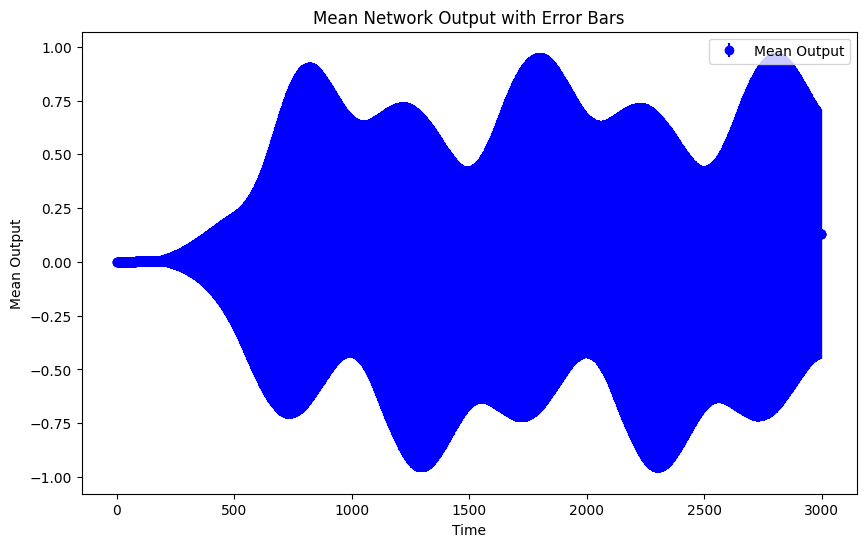

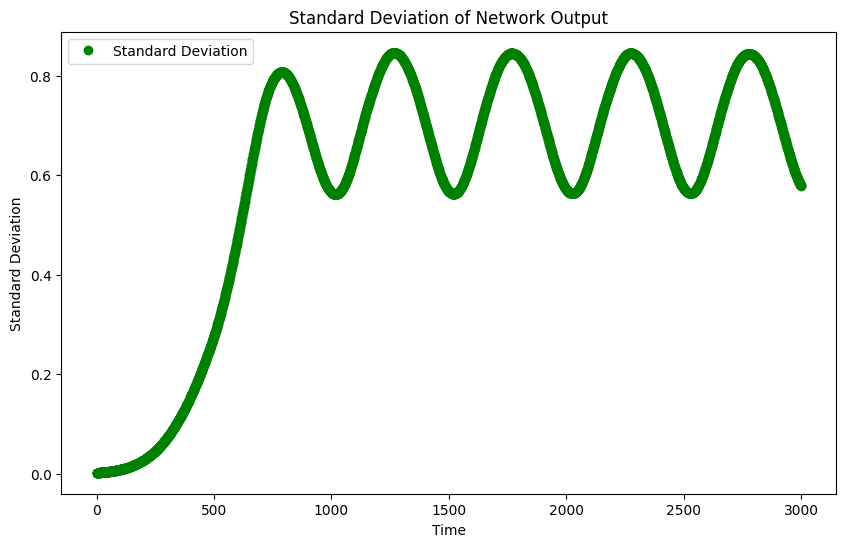

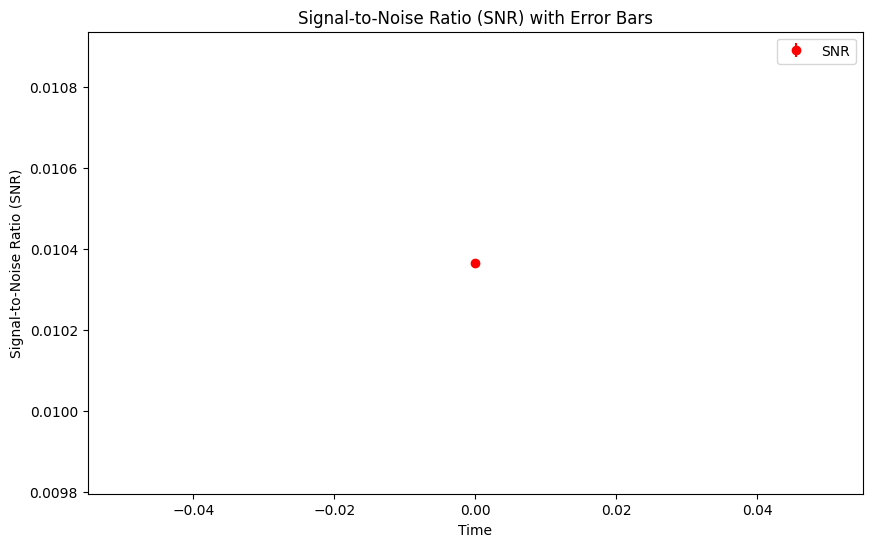

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10

# Define the Nengo model
def simulate_nengo_model():
    model = nengo.Network()
    with model:
        ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                             max_rates=nengo.dists.Uniform(0.5, 1))

        def oscillator(x):
            r = 1
            f = 1
            m = 10
            return [
                synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
                synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
            ]

        c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                             solver=nengo.solvers.LstsqL2(reg=reg))
        output = nengo.Node(None, size_in=1)
        c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

        p_neurons = nengo.Probe(ens.neurons)
        p_out = nengo.Probe(output)

    # Simulate the model
    with nengo.Simulator(model, dt=dt) as sim:
        sim.run(simulation_time)

    return sim.data[p_out]

# Simulate multiple runs and collect output data
output_data_all = []
for _ in range(num_simulations):
    output_data_all.append(simulate_nengo_model()[:, 0])  # Convert 2D array to 1D

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Calculate signal-to-noise ratio (SNR)
signal = np.mean(mean_output)
noise = np.mean([np.std(data) for data in output_data_all])
snr = signal / noise

# Calculate error bars for mean and SNR
mean_error = np.std(output_data_all, axis=0)
snr_error = np.std(snr)

# Plot mean output as scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(mean_output)), mean_output, yerr=mean_error, fmt='o', label='Mean Output', color='b')
plt.xlabel('Time')
plt.ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.legend()
plt.show()

# Plot standard deviation as scatter plot
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(std_output)), std_output, fmt='o', label='Standard Deviation', color='g')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Network Output')
plt.legend()
plt.show()

# Plot SNR as scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(0, snr, yerr=snr_error, fmt='o', label='SNR', color='r')
plt.xlabel('Time')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) with Error Bars')
plt.legend()
plt.show()


//individual scatter

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

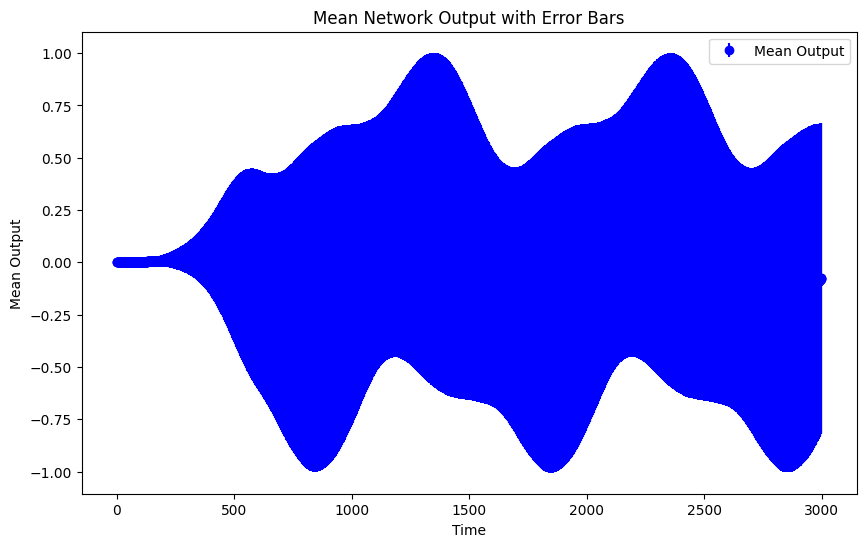

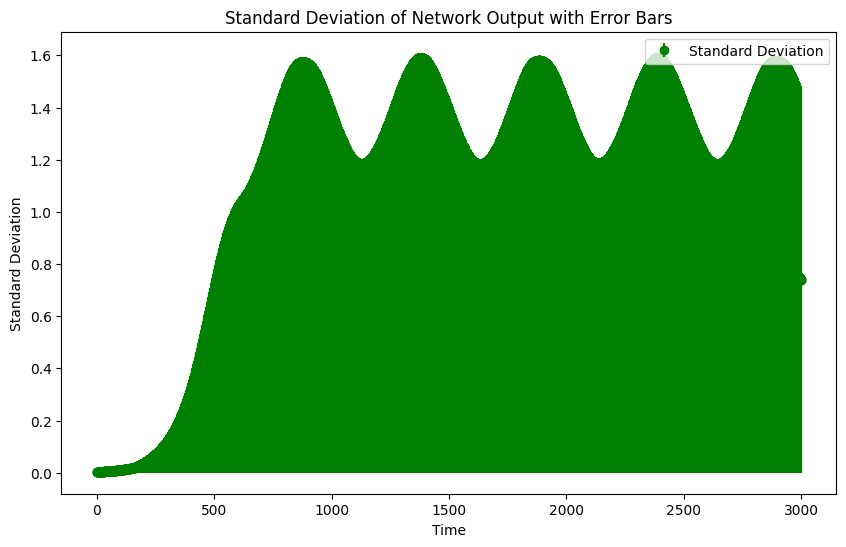

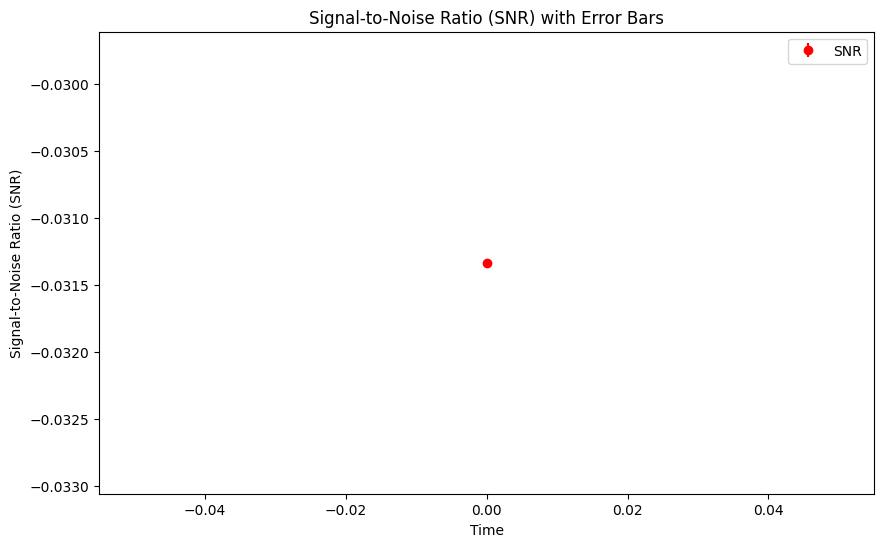

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10

# Define the Nengo model
def simulate_nengo_model():
    model = nengo.Network()
    with model:
        ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                             max_rates=nengo.dists.Uniform(0.5, 1))

        def oscillator(x):
            r = 1
            f = 1
            m = 10
            return [
                synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
                synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
            ]

        c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                             solver=nengo.solvers.LstsqL2(reg=reg))
        output = nengo.Node(None, size_in=1)
        c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

        p_neurons = nengo.Probe(ens.neurons)
        p_out = nengo.Probe(output)

    # Simulate the model
    with nengo.Simulator(model, dt=dt) as sim:
        sim.run(simulation_time)

    return sim.data[p_out]

# Simulate multiple runs and collect output data
output_data_all = []
for _ in range(num_simulations):
    output_data_all.append(simulate_nengo_model()[:, 0])  # Convert 2D array to 1D

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Calculate signal-to-noise ratio (SNR)
signal = np.mean(mean_output)
noise = np.mean([np.std(data) for data in output_data_all])
snr = signal / noise

# Calculate error bars for mean and SNR
mean_error = np.std(output_data_all, axis=0)
std_error = np.std(output_data_all, axis=0)
snr_error = np.std(snr)

# Plot mean output as scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(mean_output)), mean_output, yerr=mean_error, fmt='o', label='Mean Output', color='b')
plt.xlabel('Time')
plt.ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.legend()
plt.show()

# Plot standard deviation as scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(np.arange(len(std_output)), std_output, yerr=std_error, fmt='o', label='Standard Deviation', color='g')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Network Output with Error Bars')
plt.legend()
plt.show()

# Plot SNR as scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(0, snr, yerr=snr_error, fmt='o', label='SNR', color='r')
plt.xlabel('Time')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) with Error Bars')
plt.legend()
plt.show()


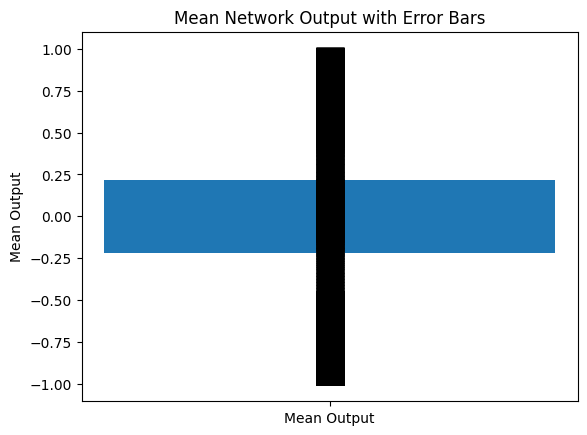

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Define the labels
labels = ['Mean Output']

# Plot the bar chart with error bars
fig, ax = plt.subplots()
ax.bar(labels, mean_output, yerr=std_output, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean Output')
plt.title('Mean Network Output with Error Bars')
plt.show()

ValueError: Dimensions of labels and X must be compatible

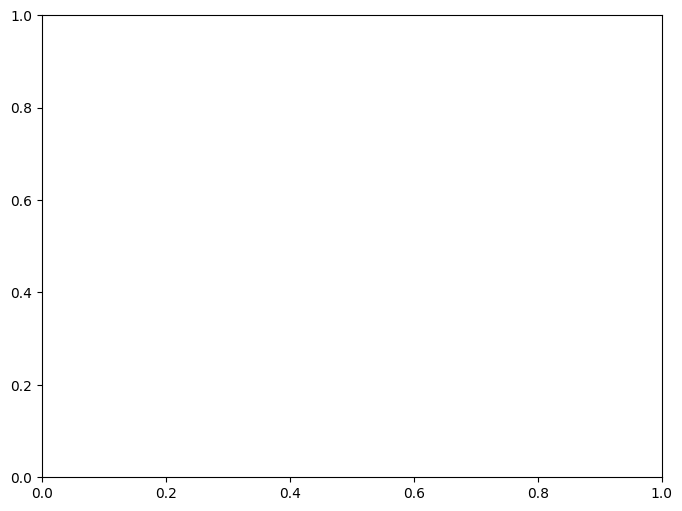

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Define the labels
labels = ['s1+', 's2+', 's1-, s2-']

# Plot the box plot with error bars
plt.figure(figsize=(8, 6))
plt.boxplot(output_data_all, labels=labels, showmeans=True, meanline=True, notch=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), whiskerprops=dict(color='black'),
            capprops=dict(color='black'), medianprops=dict(color='black'), meanprops=dict(color='red'),
            flierprops=dict(marker='o', color='red', markersize=5))
plt.errorbar(np.arange(1, len(labels) + 1), mean_output, yerr=std_output, fmt='none', color='black', capsize=5)
plt.xlabel('Conditions')
plt.ylabel('Network Output')
plt.title('Network Output with Error Bars (Box Plot)')
plt.show()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

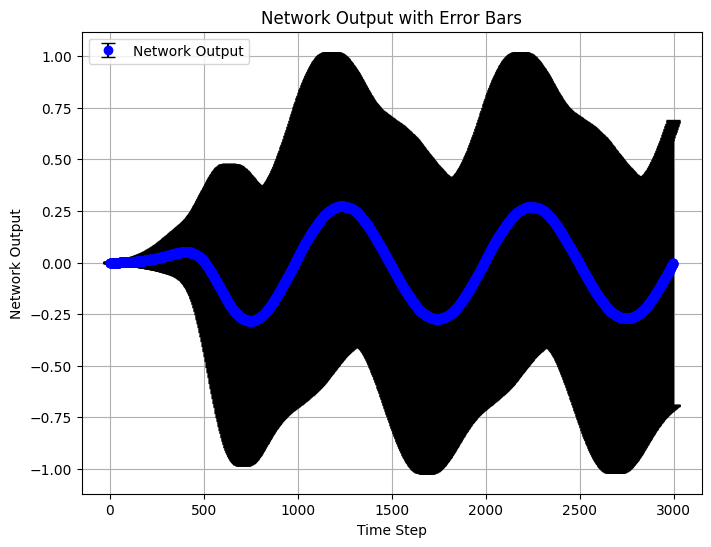

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001
simulation_time = 3
num_simulations = 10

# Define the Nengo model
def simulate_nengo_model():
    model = nengo.Network()
    with model:
        ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                             max_rates=nengo.dists.Uniform(0.5, 1))

        def oscillator(x):
            r = 1
            f = 1
            m = 10
            return [
                synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
                synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
            ]

        c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                             solver=nengo.solvers.LstsqL2(reg=reg))
        output = nengo.Node(None, size_in=1)
        c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

        p_neurons = nengo.Probe(ens.neurons)
        p_out = nengo.Probe(output)

    # Simulate the model
    with nengo.Simulator(model, dt=dt) as sim:
        sim.run(simulation_time)

    return sim.data[p_out]

# Simulate multiple runs and collect output data
output_data_all = []
for _ in range(num_simulations):
    output_data_all.append(simulate_nengo_model()[:, 0])  # Convert 2D array to 1D

# Calculate mean and standard deviation across simulations
mean_output = np.mean(output_data_all, axis=0)
std_output = np.std(output_data_all, axis=0)

# Define the x values (we only have one set of data)
x_values = np.arange(len(mean_output))

# Plot the mean with error bars and add a legend
plt.figure(figsize=(8, 6))
plt.errorbar(x_values, mean_output, yerr=std_output, fmt='o', color='blue', ecolor='black', capsize=5, label='Network Output')
plt.xlabel('Time Step')
plt.ylabel('Network Output')
plt.title('Network Output with Error Bars')
plt.grid(True)
plt.legend()
plt.show()


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

/usr/local/lib/python3.10/dist-packages/nengo/base.py:105: SyntaxWarning: Creating new attribute 'data' on '<Probe of 'output' of <Neurons of <Ensemble (unlabeled) at 0x7e2c15245240>>>'. Did you mean to change an existing attribute?
  warnings.warn(


Connection to the output node not found.


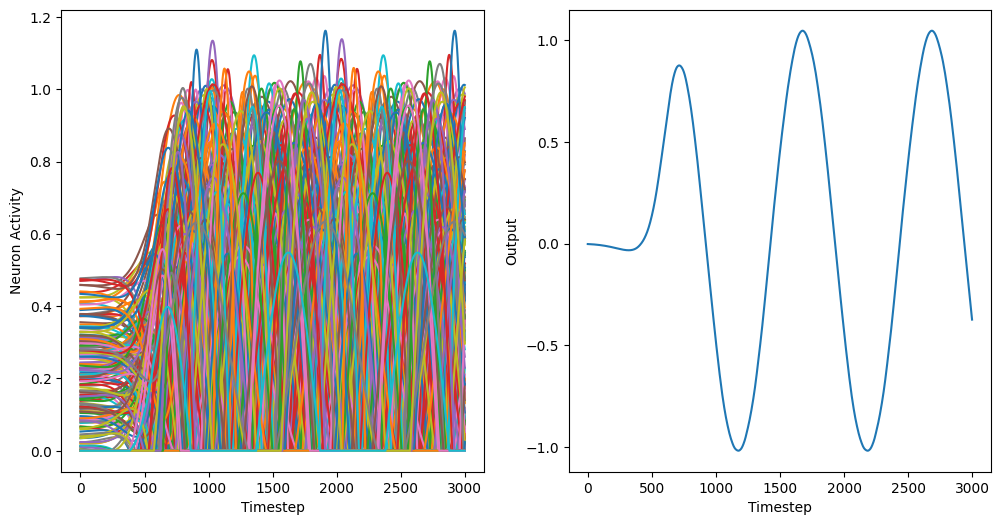

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import nengo

# Define model parameters
n_neurons = 300
synapse = 0.1
reg = 0.1
dt = 0.001

# Function to introduce Gaussian noise to input data
# def add_gaussian_noise(data, mean=0, std=0.1):
#     noise = np.random.normal(mean, std, size=data.shape)
#     return data + noise

# Function to introduce Gaussian noise to encoder vectors
def add_gaussian_noise_to_encoders(ens, mean=0, std=0.1):
    # encoders = ens.encoders.copy()
    # noise = np.random.normal(mean, std, size=ens.encoders.shape)
    # encoders = ens.radius * (ens.encoders + noise)
    # ens.encoders = nengo.dists.Choice(encoders)
    dimension = ens.dimensions
    noise = np.random.normal(mean, std, size=(ens.n_neurons, dimension))
    # encoders = ens.radius * (ens.encoders + noise)
    # encoders = ens.encoders.copy() + noise
    # encoders = ens.encoders.scattered_normal(mean, std, ens.n_neurons, dimension)
    # ens.encoders = nengo.dists.Choice(encoders)
    encoders = ens.radius * nengo.dists.UniformHypersphere(surface=True).sample(ens.n_neurons, dimension)
    encoders += noise
    ens.encoders = encoders

# Function to implement dropout mechanism
def dropout(data, dropout_rate=0.2):
    mask = np.random.binomial(1, 1 - dropout_rate, size=data.shape)
    return data * mask / (1 - dropout_rate)

# Function to generate adversarial perturbations
def generate_adversarial_perturbation(data, epsilon=0.1):
    perturbation = np.sign(np.random.normal(0, 1, size=data.shape)) * epsilon
    return perturbation

# Define the model
model = nengo.Network()
with model:
    # Define the neural ensemble
    ens = nengo.Ensemble(n_neurons=n_neurons, dimensions=2, neuron_type=nengo.RectifiedLinear(),
                         max_rates=nengo.dists.Uniform(0.5, 1))

    # Define the oscillator function
    def oscillator(x):
        r = 1
        f = 1
        m = 10
        return [
            synapse * (-x[1] * f * 2 * np.pi + m * x[0] * (r - x[0] ** 2 - x[1] ** 2)) + x[0],
            synapse * (x[0] * f * 2 * np.pi + m * x[1] * (r - x[0] ** 2 - x[1] ** 2)) + x[1],
        ]

    # Define the recurrent connection with noise
    c = nengo.Connection(ens, ens, synapse=synapse, function=oscillator,
                         solver=nengo.solvers.LstsqL2(reg=reg))

    # Define the output node
    output = nengo.Node(None, size_in=1)
    c_out = nengo.Connection(ens, output, synapse=None, function=lambda x: x[0])

    # Define Probes
    p_neurons = nengo.Probe(ens.neurons)
    p_out = nengo.Probe(output)

# Modify initial ensemble parameters
# with nengo.Simulator(model) as sim:
#     print(dir(ens.encoders))
#     ens.encoders = add_gaussian_noise(ens.encoders)
#     ens.bias = add_gaussian_noise(ens.bias)

with nengo.Simulator(model) as sim:
    add_gaussian_noise_to_encoders(ens)

# Simulate the model
sim = nengo.Simulator(model, dt=dt)
with sim:
    # Apply dropout to neuron activities
    # sim.data[p_neurons] = dropout(sim.data[p_neurons])

    # Generate adversarial perturbation for output weights
    # sim.data[c_out].weights += generate_adversarial_perturbation(sim.data[c_out].weights)

    # Run the simulation
    sim.run(3)

    # Create a copy of the neuron activities array
    neuron_activities_copy = sim.data[p_neurons].copy()

    # Apply dropout noise to neuron activities
    for i in range(len(neuron_activities_copy)):
        neuron_activities_copy[i] = dropout(neuron_activities_copy[i])

    # Generate adversarial perturbation for output weights
    # adversarial_perturbation = generate_adversarial_perturbation(sim.data[c_out].weights.copy())
    # sim.data[c_out].weights += adversarial_perturbation

    # Update the neuron activities in sim.data
    # sim.data[p_neurons] = neuron_activities_copy
    # sim.data[p_neurons].set_p(neuron_activities_copy)
    p_neurons.data = neuron_activities_copy

    # Generate adversarial perturbation for output weights
    adversarial_perturbation = generate_adversarial_perturbation(sim.data[c_out].weights.copy())
    # sim.model.connections[sim.model.objs.index(c_out)].weights += adversarial_perturbation
    # sim.model.params[c_out]['weights'] += adversarial_perturbation

    # Get the connection corresponding to the output node
    # conn_index = sim.model.probes.index(c_out)
    # sim.model.probes[conn_index]['weights'] += adversarial_perturbation
    # conn = sim.model.connections[sim.model.objs.index(c_out)]
    # conn = sim.model.objs[sim.model.objs.index(c_out)]
    # conn = sim.model.get_connections_to(c_out)
    # conn.weights += adversarial_perturbation

    # Find the connection corresponding to the output node
    conn = None
    # for connection in sim.model.connections:
    #     if connection.post_obj == c_out:
    #         conn = connection
    #         break

    # if conn is not None:
    #     conn.weights += adversarial_perturbation
    # else:
    #     print("Connection to the output node not found.")
    for param_name, param in sim.model.params.items():
        if isinstance(param, nengo.Connection) and param.post == c_out:
            conn = param
            break

    if conn is not None:
        conn.weights += adversarial_perturbation
    else:
        print("Connection to the output node not found.")

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sim.data[p_neurons])
plt.xlabel('Timestep')
plt.ylabel('Neuron Activity')

plt.subplot(1, 2, 2)
plt.plot(sim.data[p_out])
plt.xlabel('Timestep')
plt.ylabel('Output')
plt.show()


FeedForward Network...


Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2989 - accuracy: 0.9141 - val_loss: 0.1467 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1443 - accuracy: 0.9573 - val_loss: 0.1123 - val_accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1073 - accuracy: 0.9671 - val_loss: 0.0850 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0897 - accuracy: 0.9728 - val_loss: 0.0764 - val_accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0764 - accuracy: 0.9754 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0665 - accuracy: 0.9797 - val_loss: 0.0761 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0592 - accuracy: 0.9815 - val_loss: 0.0718 - val_accurac

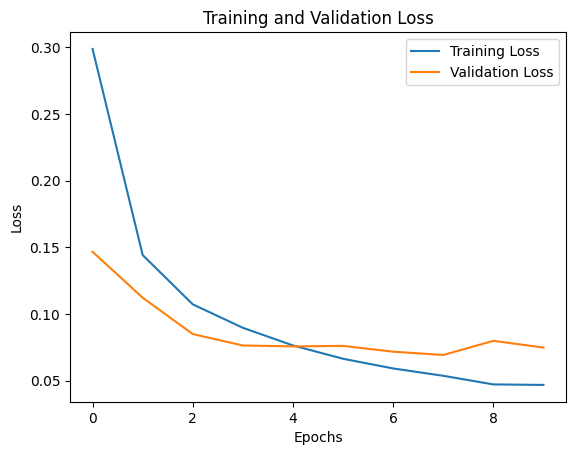

In [39]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf

# # Generate synthetic data
# np.random.seed(0)
# X_train = np.random.randn(100, 1)
# y_train = 2 * X_train.squeeze() + 1 + 0.1 * np.random.randn(100)

# # Define a simple feedforward neural network
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
#     tf.keras.layers.Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, verbose=0)

# # Plot the training history
# plt.plot(history.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Training Loss')
# plt.show()

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3761 - accuracy: 0.8878 - val_loss: 0.1602 - val_accuracy: 0.9529
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1947 - accuracy: 0.9411 - val_loss: 0.1232 - val_accuracy: 0.9641
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1557 - accuracy: 0.9520 - val_loss: 0.1020 - val_accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1312 - accuracy: 0.9592 - val_loss: 0.0884 - val_accuracy: 0.9730
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1179 - accuracy: 0.9635 - val_loss: 0.0911 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1065 - accuracy: 0.9663 - val_loss: 0.0892 - val_accuracy: 0.9720
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0982 - accuracy: 0.9688 - val_loss: 0.0827 - val_accu

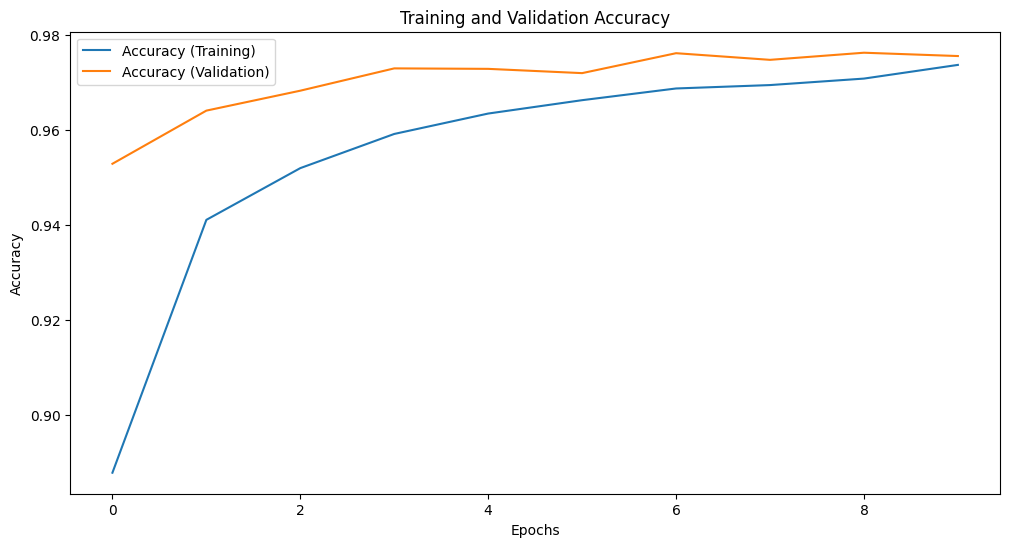

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Introduce Gaussian noise to the training and testing data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.randn(*x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.randn(*x_test.shape)

# Clip the values to stay within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to introduce noise
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Another dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on noisy data
history_noisy = model.fit(x_train_noisy, y_train, epochs=10, validation_data=(x_test_noisy, y_test))

# Evaluate the model on clean data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy on clean data:', test_acc)

# Evaluate the model on noisy data
test_loss_noisy, test_acc_noisy = model.evaluate(x_test_noisy, y_test, verbose=2)
print('\nTest accuracy on noisy data:', test_acc_noisy)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history_noisy.history['accuracy'], label='Accuracy (Training)')
plt.plot(history_noisy.history['val_accuracy'], label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


SNR for clean test data: 13.217269693330936
SNR for noisy test data: 13.217269693330936


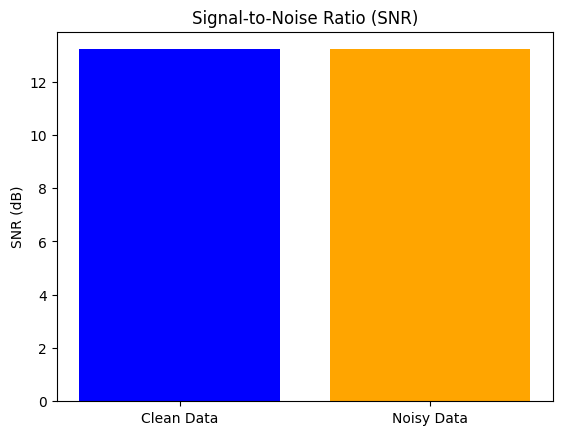

In [41]:
# Calculate the signal-to-noise ratio (SNR) for clean and noisy test data
def calculate_snr(clean_data, noisy_data):
    clean_signal_power = np.mean(np.square(clean_data))
    noise_power = np.mean(np.square(clean_data - noisy_data))
    snr = 10 * np.log10(clean_signal_power / noise_power)
    return snr

# Calculate SNR for clean and noisy test data
snr_clean = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))
snr_noisy = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))

print("SNR for clean test data:", snr_clean)
print("SNR for noisy test data:", snr_noisy)

# Plot SNR
plt.bar(['Clean Data', 'Noisy Data'], [snr_clean, snr_noisy], color=['blue', 'orange'])
plt.ylabel('SNR (dB)')
plt.title('Signal-to-Noise Ratio (SNR)')
plt.show()

Adding Dropout Noise

Epoch 1/20
375/375 [==============================] - 11s 26ms/step - loss: 0.2975 - accuracy: 0.9099 - val_loss: 0.1377 - val_accuracy: 0.9599
Epoch 2/20
375/375 [==============================] - 9s 24ms/step - loss: 0.1174 - accuracy: 0.9645 - val_loss: 0.0929 - val_accuracy: 0.9709
Epoch 3/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0915 - val_accuracy: 0.9731
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0874 - val_accuracy: 0.9743
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0501 - accuracy: 0.9835 - val_loss: 0.0819 - val_accuracy: 0.9761
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0767 - val_accuracy: 0.9778
Epoch 7/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0361 - accuracy: 0.9885 - val_loss: 0.0782 - val_accuracy: 0.978

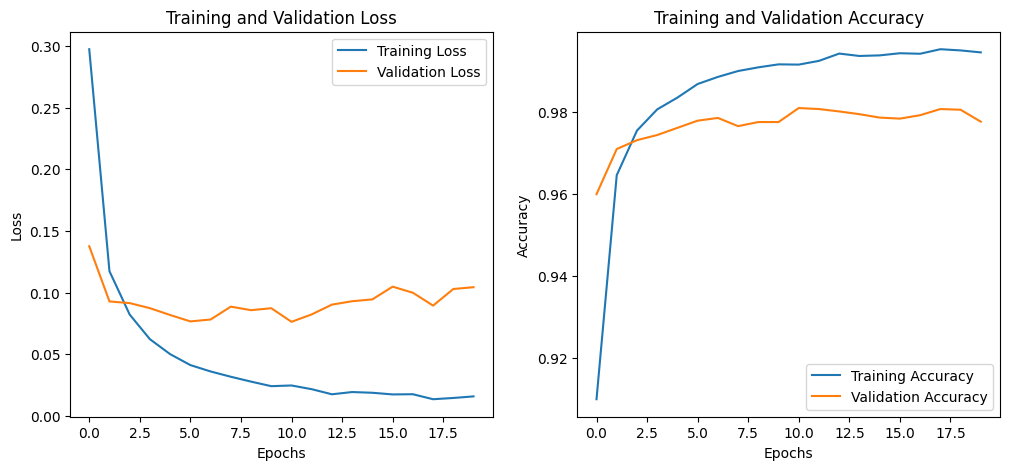

Test Loss: 0.0943
Test Accuracy: 0.9804


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Monitor the model's performance and assess its robustness against dropout noise.

Epoch 1/20
375/375 [==============================] - 10s 23ms/step - loss: 0.3009 - accuracy: 0.9103 - val_loss: 0.1245 - val_accuracy: 0.9638
Epoch 2/20
375/375 [==============================] - 8s 21ms/step - loss: 0.1186 - accuracy: 0.9647 - val_loss: 0.0958 - val_accuracy: 0.9700
Epoch 3/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0810 - accuracy: 0.9745 - val_loss: 0.0844 - val_accuracy: 0.9746
Epoch 4/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.0835 - val_accuracy: 0.9752
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0750 - val_accuracy: 0.9772
Epoch 6/20
375/375 [==============================] - 6s 16ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0735 - val_accuracy: 0.9786
Epoch 7/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.0859 - val_accuracy: 0.97

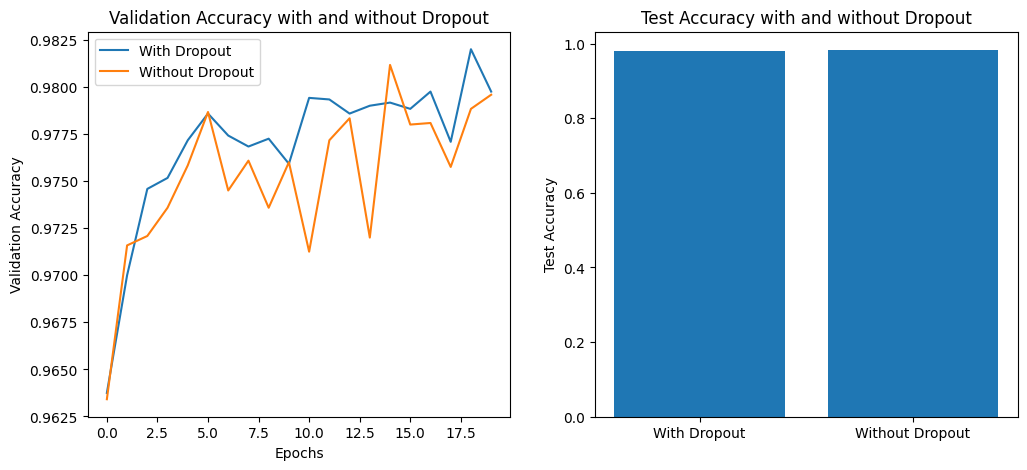

Test Accuracy with Dropout: 0.9812
Test Accuracy without Dropout: 0.9826


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
def build_model(dropout=True):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate model with dropout
model_with_dropout = build_model(dropout=True)
model_with_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

# Train and evaluate model without dropout
model_without_dropout = build_model(dropout=False)
model_without_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_no_dropout, test_accuracy_no_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with and without Dropout')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['With Dropout', 'Without Dropout'], [test_accuracy_dropout, test_accuracy_no_dropout])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy with and without Dropout')
plt.show()

print(f'Test Accuracy with Dropout: {test_accuracy_dropout:.4f}')
print(f'Test Accuracy without Dropout: {test_accuracy_no_dropout:.4f}')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from cleverhans.tf2.attacks.projected_gradient_descent import projected_gradient_descent

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define adversarial attack parameters
eps = 0.1  # perturbation size
eps_iter = 0.01  # attack step size
nb_iter = 40  # number of attack iterations
clip_min = 0.0  # minimum pixel value
clip_max = 1.0  # maximum pixel value

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Generate adversarial examples
pgd_attack = projected_gradient_descent.ProjectGradientDescent(model)
X_adv = pgd_attack.generate(X_test, eps=eps, eps_iter=eps_iter, nb_iter=nb_iter, clip_min=clip_min, clip_max=clip_max)

# Evaluate the model on adversarial examples
adv_loss, adv_acc = model.evaluate(X_adv, y_test, verbose=2)
print("\nAdversarial test accuracy:", adv_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

# Plot sample adversarial examples
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_adv[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(model.predict(X_adv[i][None]))}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate Signal-to-Noise Ratio (SNR)
snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))
print("\nSignal-to-Noise Ratio (SNR):", snr)
